In [34]:
import keras 
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D

In [35]:
##data agumentation -- is a technique to increase the 
# number of training data

##from which you cann artifically expand the size of dataset 
##it is done to increase the accuracy of the model

In [36]:
batch_size = 32 
num_classes = 10
data_agumentation = True

In [37]:
##train and testing 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [38]:
##convert class vertors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
x_train  = x_train.astype('float32')
x_test = x_test.astype('float32')

##normalise the data --- range me leke ana data ko 
x_train /= 255
x_test /= 255

In [40]:
##model define 
model = Sequential()

##convolutional layer --- feature extract 
##pooling 
##flatten 
#Dense 


#32 == no of filters/kernel
#(3,3) == kernel size
## normal distrubution == random normal ,,, mean = 0 and std = 1(by default)
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                 input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                 input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                 input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                 input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                 input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 32)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │        16,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,398 (232.02 KB)

 Trainable params: 59,398 (232.02 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'RMSProp',
             metrics = ['accuracy'])

In [42]:
##32 images process at a time --- weight 


ml = model.fit(x_train, y_train,
              batch_size = batch_size,
              epochs = 50 ,
              validation_data = (x_test, y_test),
              shuffle = True)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 87ms/step - accuracy: 0.2092 - loss: 2.0775 - val_accuracy: 0.3273 - val_loss: 1.7952
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.3912 - loss: 1.6420 - val_accuracy: 0.4177 - val_loss: 1.6495
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.4575 - loss: 1.4728 - val_accuracy: 0.4651 - val_loss: 1.4556
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 99ms/step - accuracy: 0.5019 - loss: 1.3704 - val_accuracy: 0.4754 - val_loss: 1.4765
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.5338 - loss: 1.2974 - val_accuracy: 0.5129 - val_loss: 1.3165
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 113ms/step - accuracy: 0.5570 - loss: 1.2355 - val_accuracy: 0.5557 - val_loss: 1.2310
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.5700 - loss: 1.2024 - val_accuracy: 0.5629 - val_loss: 1.2288
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 99ms/step - accura

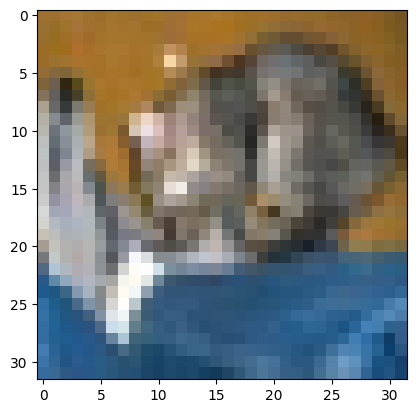

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
3


In [43]:
import matplotlib.pyplot as plt
import numpy as np
img = x_test[0]
plt.imshow(img)
plt.show()
##expand the dimensions to make it batch-size 1 
##shape (32,32,3) to (1,32,32,3)
img_expanded = np.expand_dims(img, axis = 0)

##predict 
prediction = model.predict(img_expanded)
predicted_class = np.argmax(prediction)
print(predicted_class)
# class_names = [
#     'airplane', 'automobile', 'bird', 'cat', 'deer',
#     'dog', 'frog', 'horse', 'ship', 'truck'
# ]

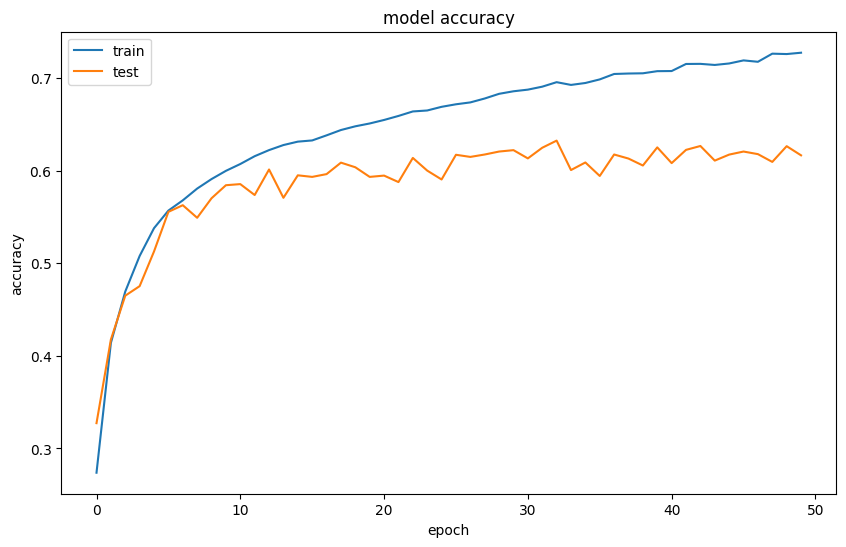

In [44]:
##acc compare between validation and train dataset 
plt.figure(figsize = (10,6))
plt.plot(ml.history['accuracy'])
plt.plot(ml.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [45]:
# Y_train = [0,2,1]
# num_class = 6
# yy_train = keras.utils.to_categorical(Y_train, num_class)

In [46]:
# yy_train
##one hot encoding 
##labels intergers --- binary 

In [47]:
# class                            Label 
# tshirt                         0
# trouser                        1
# pullover                       2
# dress                          3

# yyy_train = [0,1,2,3,0,0,5]

# yy_train = keras.utils.to_categorical(yyy_train, num_class)
# yy_train
